# Group 10 - First Year Project 
### Data Science at ITU 
## Project 1 - Road collisions analysis 2021 

The first project of Data Science's second semester required us to inform various city leaders around the United Kingdom about traffic fatalities and injuries; and give some insight for urban transport planning. This jupyter notebook presents Group 10's exploration of 2019 UK road collision data with complimentary analysis, visualisation and findings with relation to the city of Sheffield.


# Task 0 - Data filtering and cleaning
## Loading data
Our first task invovles loading our 3 csv files (downloaded from https://data.gov.uk/dataset/road-accidents-safety-data on the 4th January 2021) into a traversable data structure we can start working with; such as a dictionary. We will then need to start the process of filtering and cleaning our data.

In [60]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [61]:
raw_data = {}

TITLES = ['accidents', 'casualties', 'vehicles'] # Capitalisation is the standard for constants

Pandas has a convinient method for reading in csv files and storing the data in a DataFrame structure offers flexibility.

In [62]:
raw_data['accidents'] = pd.read_csv("../data/raw/Road Safety Data - Accidents 2019.csv", dtype = None)
raw_data['casualties'] = pd.read_csv("../data/raw/Road Safety Data - Casualties 2019.csv", dtype = None)
raw_data['vehicles'] = pd.read_csv("../data/raw/Road Safety Data- Vehicles 2019.csv", dtype = None) # File name missing a space before hyphen 

C:\Users\liter\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\liter\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
for TITLE in TITLES:
    print(TITLE + "\tDataFrame shape: " + str(raw_data[TITLE].shape))

accidents	DataFrame shape: (117536, 32)
casualties	DataFrame shape: (153158, 16)
vehicles	DataFrame shape: (216381, 23)


 ### Data type insight?

In [64]:
#todo #DO IT FASTER

## Locating our city
With our data loaded into a dictionary of DataFrames, we needed to locate the accidents that occured in Sheffield. To do this we made a mask identifying which accidents occured in the local district authority 215.


In [65]:
sheffield_mask = (raw_data['accidents']["Local_Authority_(District)"] == 215)

In [66]:
sheffield_data = {}

sheffield_data['accidents'] = raw_data['accidents'][sheffield_mask]
sheffield_data['accidents'][:5]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
44673,2019140805407,429140.0,381931.0,-1.563884,53.333509,14,2,2,1,01/01/2019,...,0,0,1,1,2,0,0,2,1,E01007926
44674,2019140805409,434290.0,385121.0,-1.486208,53.361875,14,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01008052
44676,2019140805414,435393.0,391745.0,-1.468895,53.421340,14,1,1,1,01/01/2019,...,0,1,4,1,1,0,0,1,1,E01008123
44677,2019140805567,433949.0,396778.0,-1.490081,53.466672,14,2,2,1,01/01/2019,...,0,0,1,1,1,0,0,1,1,E01007901
44680,2019140805955,433662.0,389819.0,-1.495146,53.404142,14,3,2,1,03/01/2019,...,0,0,1,1,1,0,0,1,2,E01008093


In [67]:
sheffield_data['accidents'].shape

(909, 32)

We can now see that there are 909 records of road traffic accidents occuring in Sheffield over 2019. The next step was using the primary key (accident_index) of the accidents to find the accidents in Sheffield that each casualty and vehicle linked to, in order to complete our sheffield_data dictionary.

In [68]:
sheffield_data['accidents']["Accident_Index"][:5]

44673    2019140805407
44674    2019140805409
44676    2019140805414
44677    2019140805567
44680    2019140805955
Name: Accident_Index, dtype: object

In [69]:
for TITLE in TITLES[1:]: sheffield_data[TITLE] = raw_data[TITLE][raw_data[TITLE]['Accident_Index'].isin(sheffield_data["accidents"]["Accident_Index"])]

In [70]:
for TITLE in TITLES: print("Sheffield " + TITLE + "\tDataFrame shape: " + str(sheffield_data[TITLE].shape))

Sheffield accidents	DataFrame shape: (909, 32)
Sheffield casualties	DataFrame shape: (1191, 16)
Sheffield vehicles	DataFrame shape: (1648, 23)


## Relational data table model 
In terms of the structure of the three databases or data tables, the accidents table's primary key is used as a foreign key by both the casualties and vehicles data tables, creating a one-to-many link between the accidents and both the casualties and vehicles tables. From this data table structure, we can infer that multiple casualties and vehicles can be involved in a single accident; which makes sense logically.

## Sanity check
Performing a sanity check on our Sheffield road accident data is a critical first step before we can begin to think about further analysing or drawing conclusions from the data. We may also have to sanity check all the data if we wish to draw conclusions therefrom.

In [71]:
#Check for empty strings in categorical fields  
#Check for NULL values                          #DONE more efficient method probably possible with michaels method (command line)
#Check duplicate records                        #DONE
#Check non-linked records in secondary tables   

### Checking for null values in our road accident dataset

In [72]:
flag = False
for TITLE in TITLES:
    if raw_data[TITLE].isnull().values.any():
        for column in list(raw_data[TITLE].columns):
            nulls = sum(raw_data[TITLE][column].isnull())
            if sum(raw_data[TITLE][column].isnull()):
                print(TITLE + " - " + column + "\t has " + str(nulls) + " null values")
                flag = True
if not flag: print("There are no null values in the dataset")

accidents - Location_Easting_OSGR	 has 28 null values
accidents - Location_Northing_OSGR	 has 28 null values
accidents - Longitude	 has 28 null values
accidents - Latitude	 has 28 null values
accidents - Time	 has 63 null values
accidents - LSOA_of_Accident_Location	 has 5714 null values


### Checking for null values in our sheffield dataset

In [73]:
flag = False
for TITLE in TITLES:
    if sheffield_data[TITLE].isnull().values.any():
        for column in list(sheffield_data[TITLE].columns):
            nulls = sum(sheffield_data[TITLE][column].isnull())
            if sum(sheffield_data[TITLE][column].isnull()):
                print(TITLE + " - " + column + "\t has " + str(nulls) + " null values")
                flag = True
if not flag: print("There are no null values in the dataset")

There are no null values in the dataset


In [74]:
if len(sheffield_data["accidents"]["Accident_Index"]) == len((sheffield_data["accidents"]["Accident_Index"].unique())):
    print("No repeated indexes")
else: print("Repeated indexes detected")

No repeated indexes


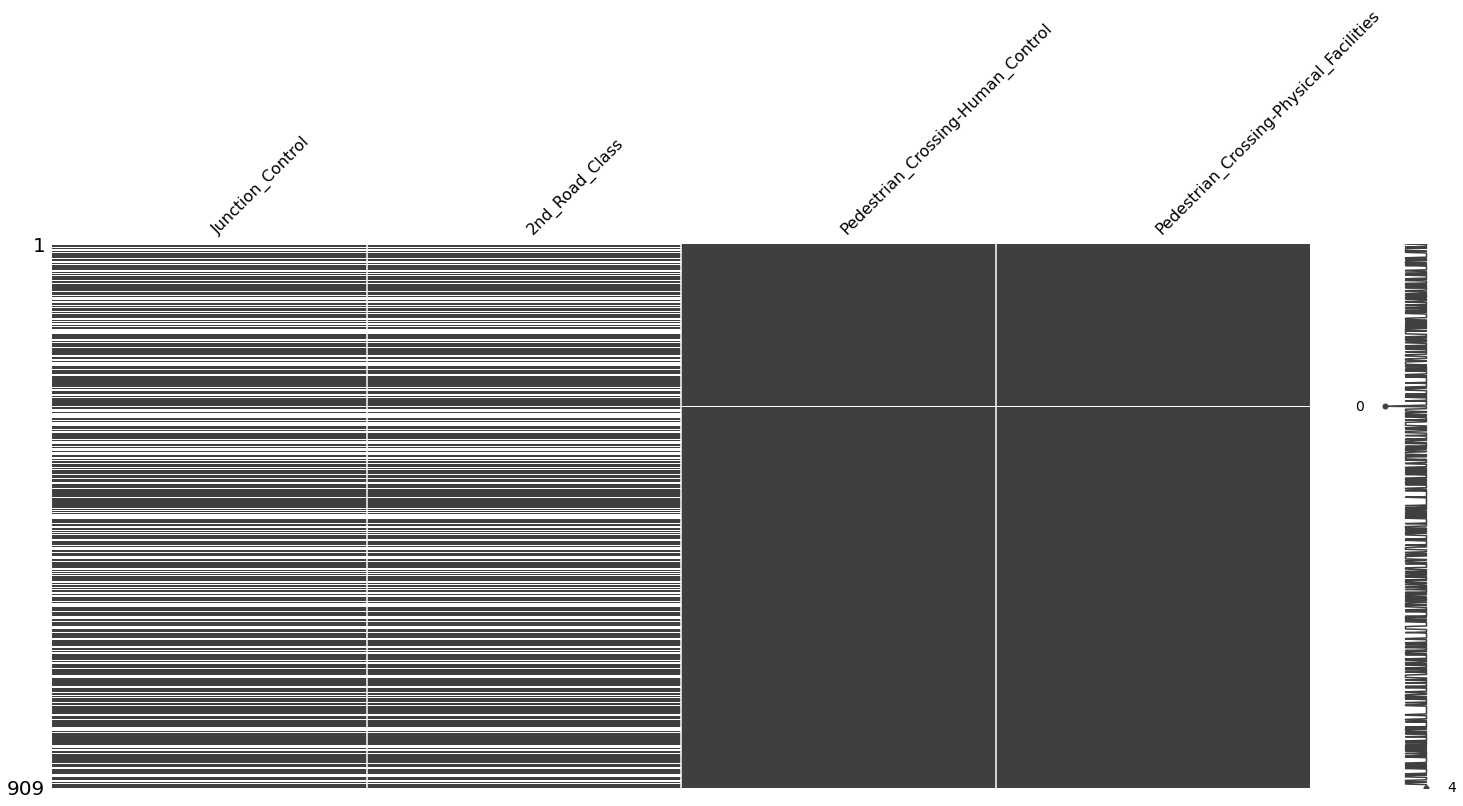

In [87]:
###NOT FULLY WORKING
sheffield_data["accidents"].replace(-1, np.nan, inplace=True)
missingdata_df = sheffield_data["accidents"].columns[sheffield_data["accidents"].isnull().any()].tolist()
msno.matrix(sheffield_data["accidents"][missingdata_df]);

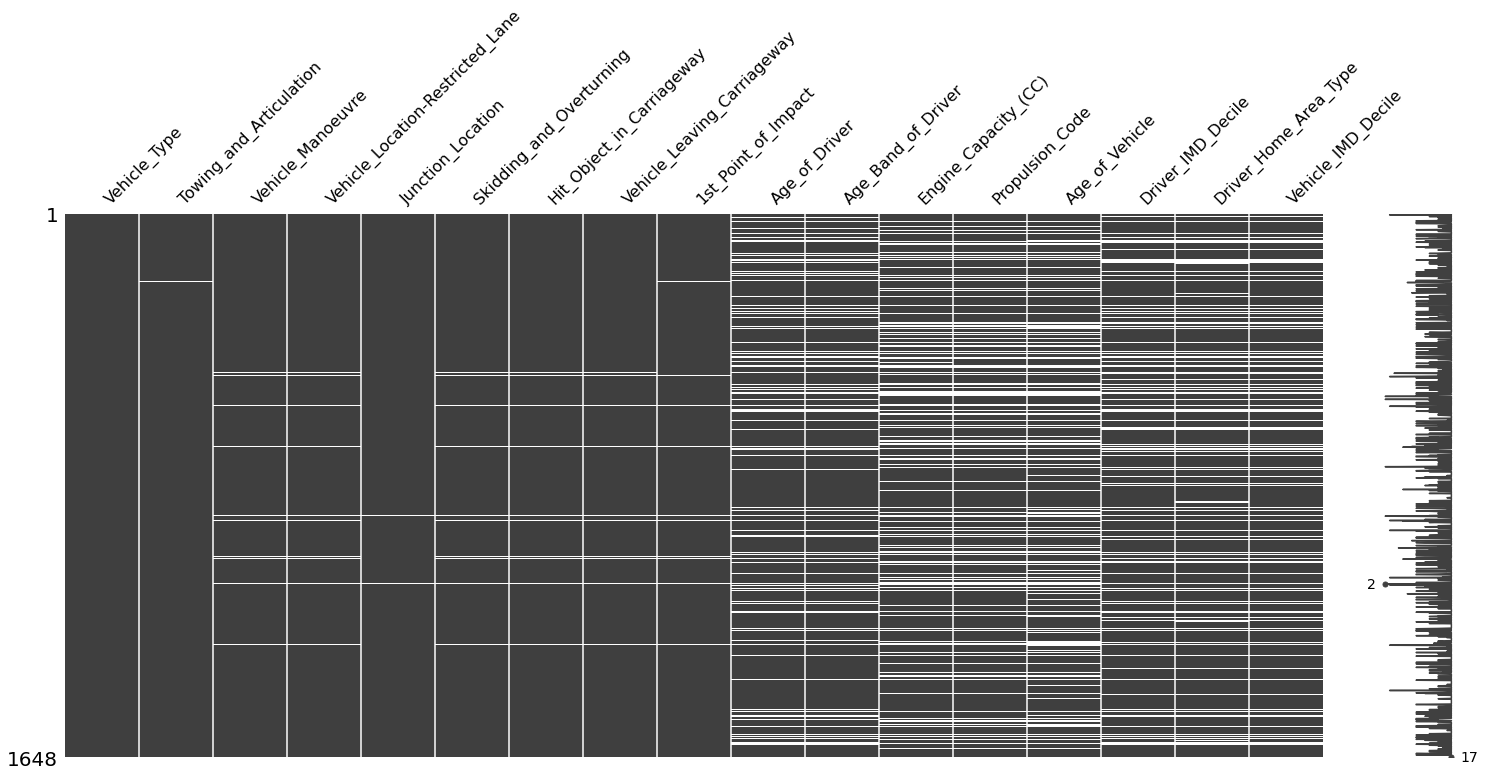

In [79]:
# ###NOT FULLY WORKING
sheffield_data['vehicles'].replace(-1, np.nan, inplace=True)
missingdata_df = sheffield_data['vehicles'].columns[sheffield_data['vehicles'].isnull().any()].tolist()
msno.matrix(sheffield_data['vehicles'][missingdata_df]);

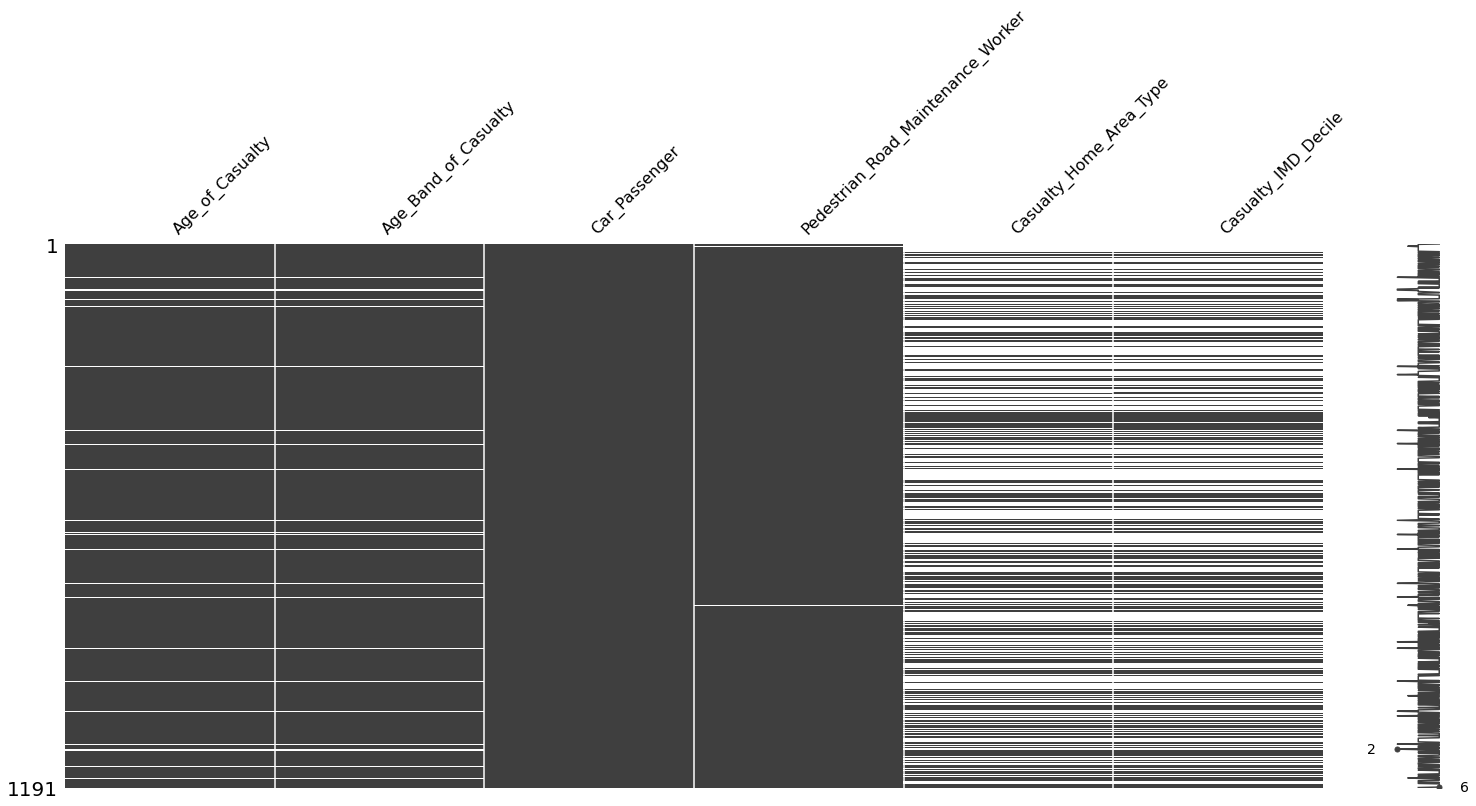

In [80]:
###NOT FULLY WORKING
sheffield_data['casualties'].replace(-1, np.nan, inplace=True)
missingdata_df = sheffield_data['casualties'].columns[sheffield_data['casualties'].isnull().any()].tolist()
msno.matrix(sheffield_data['casualties'][missingdata_df]);

## Numerical summary

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Five Number Summary

In [ ]:
#Box Plots
#NUMBER OF VEHICLES IN AN ACCIDENT
mask_num_vehicle = (sheffield_data['accidents']['Number_of_Vehicles']>0)
NumVehicles = sheffield_data['accidents']["Number_of_Vehicles"][mask_num_vehicle]
NumVehicles = NumVehicles.to_frame()
NumVehicles.describe(), NumVehicles.boxplot()

(       Age_of_Vehicle
 count     1220.000000
 mean         8.881967
 std          5.177490
 min          1.000000
 25%          5.000000
 50%          9.000000
 75%         13.000000
 max         55.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc9a8b8a30>)

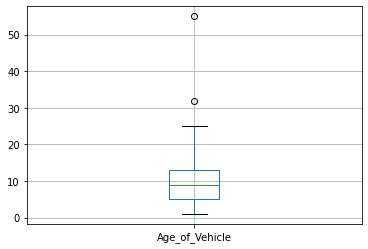

In [45]:
#AGE OF VEHICLE
mask_age_vehicle = (sheffield_data['vehicles']['Age_of_Vehicle']>=0)
AgeVehicles = sheffield_data['vehicles']['Age_of_Vehicle'][mask_age_vehicle]
AgeVehicles = AgeVehicles.to_frame()
AgeVehicles.describe(), AgeVehicles.boxplot()

(       Age_of_Driver
 count    1321.000000
 mean       40.997729
 std        15.937924
 min        18.000000
 25%        27.000000
 50%        39.000000
 75%        52.000000
 max        91.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc9a8efd90>)

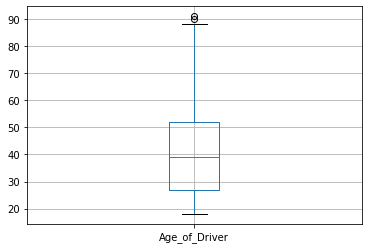

In [46]:
#AGE OF DRIVER
mask_age = (sheffield_data['vehicles']['Age_of_Driver']>=18)
Age_Driver =  sheffield_data['vehicles']["Age_of_Driver"][mask_age]
Age_Driver = Age_Driver.to_frame()
Age_Driver.describe(), Age_Driver.boxplot()

(       Age_of_Driver
 count     919.000000
 mean       41.023939
 std        15.803721
 min        18.000000
 25%        28.000000
 50%        39.000000
 75%        52.000000
 max        91.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc9d2d1d90>)

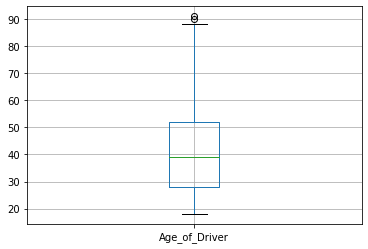

In [47]:
#AGE OF MALE DRIVERS
mask_male = (sheffield_data['vehicles']['Sex_of_Driver']==1)
Age_MaleDrivers = sheffield_data['vehicles']["Age_of_Driver"][mask_age][mask_male]
Age_MaleDrivers = Age_MaleDrivers.to_frame()
Age_MaleDrivers.describe(), Age_MaleDrivers.boxplot()

(       Age_of_Casualty
 count      1155.000000
 mean         37.101299
 std          19.469728
 min           0.000000
 25%          22.000000
 50%          34.000000
 75%          50.000000
 max          91.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc9d337a90>)

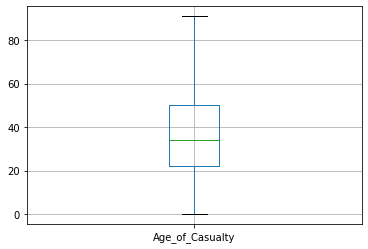

In [48]:
#AGE Of CASUALTY
mask_age2 = (sheffield_data['casualties']['Age_of_Casualty']>=0)
AgeCasualty = sheffield_data['casualties']["Age_of_Casualty"][mask_age2]
AgeCasualty = AgeCasualty.to_frame()

AgeCasualty.describe(), AgeCasualty.boxplot(),

(       Age_of_Driver
 count     396.000000
 mean       41.025253
 std        16.305606
 min        18.000000
 25%        27.000000
 50%        38.500000
 75%        53.000000
 max        85.000000,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc9d6045e0>)

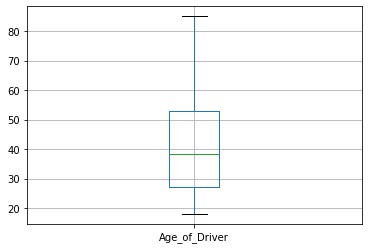

In [49]:
#AGE OF FEMALE DRIVERS
mask_female = (sheffield_data['vehicles']['Sex_of_Driver']==2)
Age_FemaleDrivers = sheffield_data['vehicles']["Age_of_Driver"][mask_age][mask_female]
Age_FemaleDrivers = Age_FemaleDrivers.to_frame()
Age_FemaleDrivers.describe(), Age_FemaleDrivers.boxplot()

In [50]:
#Frequency Histogram
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >=0)
sheffield_data["accidents"]["Number_of_Vehicles"].hist(ax=ax[0,0], bins=20, bottom=0.1,color = 'silver',edgecolor = 'black')
sheffield_data["accidents"]["Speed_limit"].hist(ax=ax[1,1], bins=7,color = 'silver',edgecolor = 'black');
sheffield_data["accidents"]["Number_of_Casualties"].hist(ax=ax[0,1], bins=20, bottom=0.1,color = 'silver',edgecolor = 'black')
sheffield_data["vehicles"]["Age_of_Driver"][mask].hist(ax=ax[1,0], bins=50, bottom=0.1,color = 'silver',edgecolor = 'black')

ax[0,0].set_title('Histogram over Number of Vehicles in an accident')
ax[1,1].set_title('Histogram over Speed Limit in an accident')
ax[0,1].set_title('Histogram over Number of Casualties in an accident')
ax[1,0].set_title('Histogram over Age of Driver in an accident')

ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')
ax[1,1].set_ylabel('Frequency')

ax[0,0].set_xlabel('Amount of vehicles')
ax[1,1].set_xlabel('Speed Limit')
ax[0,1].set_xlabel('Number of Casualties')
ax[1,0].set_xlabel('Age of Driver')

ax[0,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
plt.plot()

NameError: name 'plt' is not defined

In [ ]:
AS_count = sheffield_data["accidents"]["Accident_Severity"].value_counts()
AS_unq = sheffield_data["accidents"]["Accident_Severity"].unique()


RT = sheffield_data["accidents"]["Road_Type"][(sheffield_data["accidents"]["Road_Type"] >0)]
RT_count = RT.value_counts()
RT_unq = [1,2,3,4,5,6]

sex = sheffield_data["vehicles"]["Sex_of_Driver"][(sheffield_data["vehicles"]["Sex_of_Driver"] >0)]
sex_counts = sex.value_counts()
sex_unq = sex.unique()

CC_counts = sheffield_data["casualties"]["Casualty_Class"].value_counts()
CC_unq = sheffield_data["casualties"]["Casualty_Class"].unique()

weekday_counts = sheffield_data["accidents"]["Day_of_Week"].value_counts()
weekday_unq = sheffield_data["accidents"]["Day_of_Week"].unique()
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0,0].set_title("Accident Severity Frequency Barplot")
ax[0,0].set_ylabel("Frequency")
ax[0,0].bar(sorted(AS_unq), sorted(AS_count), tick_label = ["Fatal", "Serious", "Slight"],color = 'silver',edgecolor = 'black')

ax[1,0].set_title("Road Type Frequency Barplot")
ax[1,0].set_ylabel("Road Type")
ax[1,0].set_xlabel("Frequency")
l = ["Roundabout", "One way street", "Dual carriageway","Single carriageway", "Slip road", "Unknown"]  
ax[1,0].barh(sorted(RT_unq), sorted(RT_count), tick_label = l,color = 'silver',edgecolor = 'black')

                                                                                                                        


ax[0,1].set_title("Sex Frequency Barplot")
ax[0,1].set_ylabel("Frequency")
ax[0,1].bar(sorted(sex_unq), sex_counts, tick_label = ["Male","Female","Not Known"],color = 'silver',edgecolor = 'black')


ax[1,1].set_title("Casualty Class Frequency Barplot")
ax[1,1].set_ylabel("Frequency")
ax[1,1].bar(sorted(CC_unq), CC_counts, tick_label = ["Driver or rider", "Passenger", "Pedestrian"],color = 'silver',edgecolor = 'black')


ax[2,0].set_title("Weekday Frequency Barplot")
ax[2,0].set_ylabel("Frequency")
ax[2,0].bar(sorted(weekday_unq), weekday_counts, tick_label = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday","Saturday", "Sunday"],color = 'silver',edgecolor = 'black')

plt.plot();

# Task 1 - Single variable analysis
### Report the frequency of road collisions in your city for 

1. different age groups 
2. in different times (during the day, the week, or year)
3. and for differences in one other condition.


#### Different age groups

In [51]:
mask_age = (sheffield_data["vehicles"]["Age_of_Driver"] >= 0)
AoD = sheffield_data["vehicles"]["Age_of_Driver"][mask_age]


l = []
mask = (sheffield_data["vehicles"]["Age_of_Driver"] <20)

l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >20) & (sheffield_data["vehicles"]["Age_of_Driver"] <40)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >40) & (sheffield_data["vehicles"]["Age_of_Driver"] <60)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >60) & (sheffield_data["vehicles"]["Age_of_Driver"] <80)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >80)
l.append(AoD[mask].shape[0])

fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield for different age groups")
axes.set_ylabel("Frequency")
interval = ["<20",'20-40', '40-60', '60-80', '80+']
axes.bar(interval, l,color = 'silver',edgecolor = 'black');

NameError: name 'plt' is not defined

#### Different times

##### Day

In [52]:
l = [['00:00', '02:00'], 
     ['02:00', '04:00'], 
     ['04:00', '06:00'], 
     ['06:00', '08:00'], 
     ['08:00', '10:00'], 
     ['10:00', '12:00'],
     ['12:00', '14:00'], 
     ['14:00', '16:00'], 
     ['16:00', '18:00'], 
     ['18:00', '20:00'], 
     ['20:00', '22:00'],
     ['22:00', '24:00']]

empty = []
for i in range(0,12):
    mask = (sheffield_data["accidents"]["Time"] < l[i][1]) & (sheffield_data["accidents"]["Time"] > l[i][0])
    total = len(sheffield_data["accidents"][mask]["Time"])
    empty.append(total)
    
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield in a 2 hour interval")
axes.set_ylabel("Frequency")
interval = ["00:00-02:00",'02:00-04:00', '04:00-06:00', '06:00-08:00', '08:00-10:00', '10:00-12:00',
                 '12:00-14:00','14:00-16:00', '16:00-18:00', '18:00-20:00', '20:00-22:00', '22:00-24:00']
axes.bar(interval, empty,color = 'silver',edgecolor = 'black');
for index,value in enumerate(empty):
    axes.text(index - 0.015, value + 0.05,str(value),ha='center', va='bottom')

NameError: name 'plt' is not defined

##### Week

In [53]:
week = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"]
unq = sheffield_data["accidents"]["Day_of_Week"].unique()
count = sheffield_data["accidents"]["Day_of_Week"].value_counts()
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Accidents each day from 01/01/2019 to 31/12/2019 in Sheffield")
axes.set_ylabel("Total number of accidents")
axes.bar(sorted(unq), count, tick_label = week,color = 'silver',edgecolor = 'black')
plt.plot();

NameError: name 'plt' is not defined

##### Year

##### Monthly Accident Severity

In [54]:
#####MONTHLY SEVERITY 2
accident_severity = sheffield_data['accidents']['Accident_Severity']
accident_dates = pd.to_datetime(sheffield_data['accidents']['Date'])
#accident_severity.groupby(accident_dates.dt.month).count().plot(kind="bar")
a = accident_severity.groupby(accident_dates.dt.month)
a1 = a.value_counts()

fig,ax = plt.subplots(figsize = (16,4))
a1.plot.bar(color = 'silver',edgecolor = 'black')
ax.set_title('Monthly Accident Severity')
ax.set_xlabel('(Month,Accident_Severity)')
ax.set_ylabel('Number of Accidents')
ax.legend(loc = "upper left")
for index,value in enumerate(a1):
    ax.text(index - 0.015, value + 0.05,str(value),ha='center', va='bottom')

NameError: name 'plt' is not defined

##### Number of accidents each day

In [55]:
#COUNTING THE ACCIDENTS EACH DAY IN EVERY MONTH

accident_severity = sheffield_data['accidents']['Accident_Severity']

accident_dates = pd.to_datetime(sheffield_data['accidents']['Date'])

mask = (accident_dates > "2019-12-01") & (accident_dates <= "2019-12-31")
s = accident_dates[mask].value_counts()
print(s)

2019-12-13    8
2019-12-17    6
2019-12-10    5
2019-12-09    5
2019-12-30    4
2019-12-07    4
2019-12-20    4
2019-12-15    4
2019-12-16    3
2019-12-06    3
2019-12-24    3
2019-12-03    3
2019-12-04    3
2019-12-22    3
2019-12-18    2
2019-12-08    2
2019-12-11    2
2019-12-05    2
2019-12-12    2
2019-12-31    2
2019-12-19    2
2019-12-02    2
2019-12-21    2
2019-12-29    1
2019-12-27    1
2019-12-14    1
2019-12-25    1
2019-12-28    1
2019-12-23    1
Name: Date, dtype: int64


# Task 2 - Associations
### Research whether there is a significant statistical association in your city, either
1. between some vehicle attributes and accident circumstances, or 
2. between some casualty attributes and accident circumstances. 

Report whether there is a statistically significant association between such variables or not, together with the appropriate statistical metric(s).
 
Discuss why this association, or the lack of
this association, is relevant for urban/transport planning.

# Task 3 - Map visualization
Visualize the reported collisions on a map of your city. Make a visual distinction between different
classes of casualty severity

In [56]:
BBox = min(sheffield_data["accidents"]["Longitude"]), max(sheffield_data["accidents"]["Longitude"]), min(sheffield_data["accidents"]["Latitude"]),  max(sheffield_data["accidents"]["Latitude"])
ruh_m = plt.imread('../map.png')
mask_1 = (sheffield_data["accidents"]["Accident_Severity"] == 1)
mask_2 = (sheffield_data["accidents"]["Accident_Severity"] == 2)
mask_3 = (sheffield_data["accidents"]["Accident_Severity"] == 3)
fig, ax = plt.subplots(figsize = (16,14))

ax.scatter(sheffield_data["accidents"]["Longitude"][mask_1], sheffield_data["accidents"]["Latitude"][mask_1], alpha= 0.5, c='r', s=100)
ax.scatter(sheffield_data["accidents"]["Longitude"][mask_2], sheffield_data["accidents"]["Latitude"][mask_2], alpha= 0.5, c='y', s=90)
ax.scatter(sheffield_data["accidents"]["Longitude"][mask_3], sheffield_data["accidents"]["Latitude"][mask_3], alpha= 0.5, c='g', s=80)

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal');

NameError: name 'plt' is not defined

# Task 4: Open question
Use the data to formulate, motivate, answer, and discuss another research question of your choice.
For example, compare your city to the whole UK, or investigate different collision participants (bicycle
vs car, bicycle-motored two-wheeler, pedestrian vs car, car vs car,…), or compare the age distribution
of casualties to the existing age distribution, or rank/compare how problematic different driver
demographics are (young/old male/female),…